# Introduction to Python for Machine Learning


## Table Of Contents

- [Introduction](#intro)
- [Data Wrangling](#wrangle)
- [Exploratory Data Analysis](#explore)
- [Conclusion](#end)


<a id='intro'></a>
### Introduction
This is the first stage in the Hamoye Internship, where the subject is introduction to python for machine learning.
In order to put to practice some of the skills acquired, a dataset will be investigated and some of the following questions will be answered:
- Which feature has missing values?
- What missing value imputation technique would you use?
- What is the skewness and kurtosis for the fuel quantity burned in two decimal places?
- Which year has the highest average fuel cost per unit delivered?
- What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

To begin, we first import the libraries we will use:

In [1]:
# here all the necessary libraries are imported

import pandas as pd

import numpy as np

import matplotlib.pyplot as ply

%matplotlib inline

import os # this makes it possible to load files from local directory.


<a id='wrangle'></a>
### Data Wrangling


In [2]:
# We 'read'(load the dataset) from local and save it to fuel_df 
fuel_df = pd.read_csv(r'C:\\Users\jonathan\DataScienceProjects\HamoyeIntern\fuel-data.csv')

In [3]:
# the shape function enables us to get the number of rows and columns
print(fuel_df.shape)

(29523, 11)


The resulting tuple above shows that the dataset has 29523 rows and 11 columns.

The next two functions give an overview of the dataset.

In [4]:
fuel_df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
fuel_df.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


### Dataset Description


'Record_id' : record id

'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

In [6]:
# Get a high level overview 
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


#### Which feature has missing values?

In [7]:
# show the columns with missing values
fuel_df.isnull().sum()  



record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

The column **fuel_unit** has missing values, totalling **180**.

#### What missing value imputation technique would you use?
First, we get the unique values in the column, then we use the **value_counts** function, which returns
the values with the highest count in descending order.
The highest value, ie, the **mode** is used to replace the missing values.

In [8]:
fuel_df.fuel_unit.unique()


array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [9]:
fuel_df['fuel_unit'].value_counts()


mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [10]:
fuel_df['fuel_unit'] = fuel_df['fuel_unit'].fillna('mcf')

In [11]:
# run the value_counts function again to ensure we correctly filled the missing values
fuel_df['fuel_unit'].value_counts()


mcf       11534
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [12]:
fuel_df.isnull().sum()  


record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

<a id='explore'></a>
### Exploratory Data Analysis


#### Which of the following fuel type code has the lowest average fuel cost per unit burned?


In [13]:
fuel_df.fuel_type_code_pudl.unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [14]:
# Coal average
coal_mean = fuel_df.query('fuel_type_code_pudl == "coal"')['fuel_cost_per_unit_burned'].mean()
coal_mean

67.42182999882996

In [15]:
# Gas average
gas_mean = fuel_df.query('fuel_type_code_pudl == "gas"')['fuel_cost_per_unit_burned'].mean()
gas_mean

13.659396569737135

In [16]:
# Nuclear average
nuclear_mean = fuel_df.query('fuel_type_code_pudl == "nuclear"')['fuel_cost_per_unit_burned'].mean()
nuclear_mean

4955.157002444988

In [17]:
# Oil average
oil_mean = fuel_df.query('fuel_type_code_pudl == "oil"')['fuel_cost_per_unit_burned'].mean()
oil_mean

168.87708568948383

In [18]:
waste_mean = fuel_df.query('fuel_type_code_pudl == "waste"')['fuel_cost_per_unit_burned'].mean()
waste_mean

19.518122448979593

In [19]:
other_mean = fuel_df.query('fuel_type_code_pudl == "other"')['fuel_cost_per_unit_burned'].mean()
other_mean

18.253856287425158

From the results above, we see that **gas**, with a mean of approximately **13.66**, has the lowest fuel cost per unit burned.

#### Which year has the highest average fuel cost per unit delivered?

In [20]:
fuel_df.report_year.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018], dtype=int64)

In [21]:
mean_1994 = fuel_df.query('report_year == "1994"')['fuel_cost_per_unit_delivered'].mean()
mean_1994

63.636059919028284

In [22]:
mean_1995 = fuel_df.query('report_year == "1995"')['fuel_cost_per_unit_delivered'].mean()


In [23]:
mean_1996 = fuel_df.query('report_year == "1996"')['fuel_cost_per_unit_delivered'].mean()
mean_1996

9196.7059476103

In [24]:
mean_1997 = fuel_df.query('report_year == "1997"')['fuel_cost_per_unit_delivered'].mean()
mean_1997

11140.19723948813

In [25]:
mean_1998 = fuel_df.query('report_year == "1998"')['fuel_cost_per_unit_delivered'].mean()
mean_1998

287.15442005420147

In [26]:
mean_1999 = fuel_df.query('report_year == "1999"')['fuel_cost_per_unit_delivered'].mean()
mean_1999

25.551626666666632

In [27]:
mean_2000 = fuel_df.query('report_year == "2000"')['fuel_cost_per_unit_delivered'].mean()
mean_2000

985.3628769118723

In [28]:
mean_2001 = fuel_df.query('report_year == "2001"')['fuel_cost_per_unit_delivered'].mean()
mean_2001

60.050396017699086

In [29]:
mean_2002 = fuel_df.query('report_year == "2002"')['fuel_cost_per_unit_delivered'].mean()
mean_2002

47.594360995850664

In [30]:
mean_2003 = fuel_df.query('report_year == "2003"')['fuel_cost_per_unit_delivered'].mean()
mean_2003

55.663492981007415

In [31]:
mean_2004 = fuel_df.query('report_year == "2004"')['fuel_cost_per_unit_delivered'].mean()
mean_2004

139.52427516778528

In [32]:
mean_2005 = fuel_df.query('report_year == "2005"')['fuel_cost_per_unit_delivered'].mean()
mean_2005

41.43818439716321

In [33]:
mean_2006 = fuel_df.query('report_year == "2006"')['fuel_cost_per_unit_delivered'].mean()
mean_2006

38.65748431214803

In [34]:
mean_2007 = fuel_df.query('report_year == "2007"')['fuel_cost_per_unit_delivered'].mean()
mean_2007

43.32502294303804

In [35]:
mean_2008 = fuel_df.query('report_year == "2008"')['fuel_cost_per_unit_delivered'].mean()
mean_2008

58.58819706840398

In [36]:
mean_2009 = fuel_df.query('report_year == "2009"')['fuel_cost_per_unit_delivered'].mean()
mean_2009

652.6941628477907

In [37]:
mean_2010 = fuel_df.query('report_year == "2010"')['fuel_cost_per_unit_delivered'].mean()
mean_2010

91.86210547184778

In [38]:
mean_2011 = fuel_df.query('report_year == "2011"')['fuel_cost_per_unit_delivered'].mean()
mean_2011

59.77466693548389

In [39]:
mean_2012 = fuel_df.query('report_year == "2012"')['fuel_cost_per_unit_delivered'].mean()
mean_2012

60.99450201126302

In [40]:
mean_2013 = fuel_df.query('report_year == "2013"')['fuel_cost_per_unit_delivered'].mean()
mean_2013

172.3075913261051

In [41]:
mean_2014 = fuel_df.query('report_year == "2014"')['fuel_cost_per_unit_delivered'].mean()
mean_2014

192.73718274978663

In [42]:
mean_2015 = fuel_df.query('report_year == "2015"')['fuel_cost_per_unit_delivered'].mean()
mean_2015

326.5355105215006

In [43]:
mean_2016 = fuel_df.query('report_year == "2016"')['fuel_cost_per_unit_delivered'].mean()
mean_2016

103.9017611218566

In [44]:
mean_2017 = fuel_df.query('report_year == "2017"')['fuel_cost_per_unit_delivered'].mean()
mean_2017

46.19686102719036

In [45]:
mean_2018 = fuel_df.query('report_year == "2018"')['fuel_cost_per_unit_delivered'].mean()
mean_2018

499.26996635120963

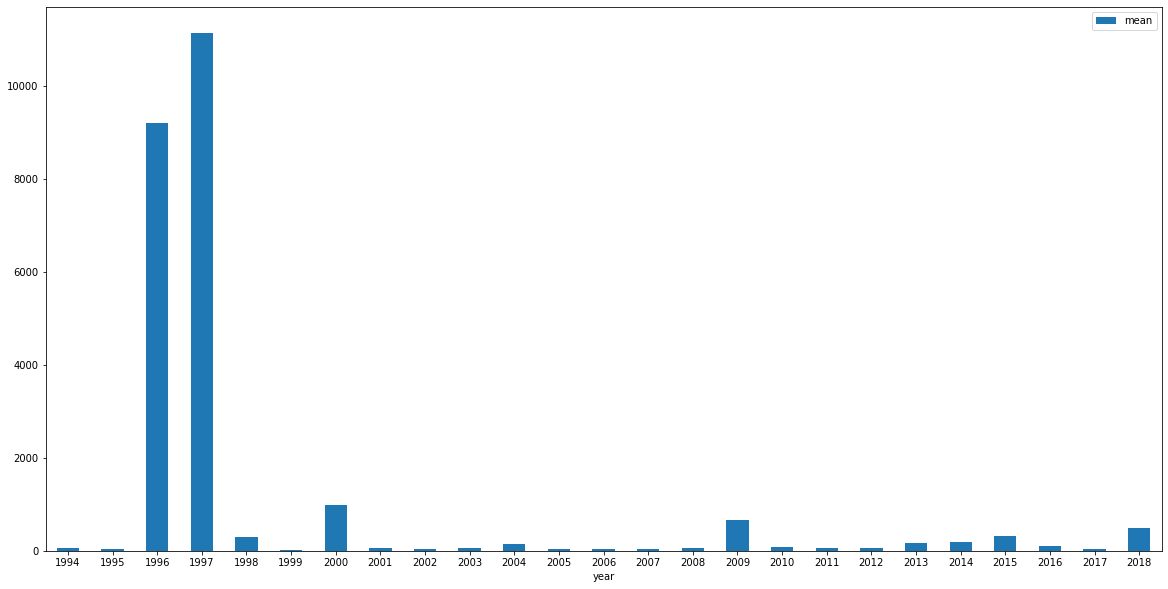

In [46]:
fuel_cost_average_df = pd.DataFrame({'year':['1994', '1995', '1996','1997','1998','1999','2000','2001','2002','2003',
                                            '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013',
                                            '2014','2015','2016','2017','2018'],
                                     'mean':[mean_1994, mean_1995,mean_1996,mean_1997,mean_1998,mean_1999,mean_2000,
                                             mean_2001,mean_2002,mean_2003,mean_2004,mean_2005,mean_2006,mean_2007,
                                            mean_2008,mean_2009,mean_2010,mean_2011,mean_2012,mean_2013,mean_2014,
                                            mean_2015,mean_2016,mean_2017,mean_2018]})
ax = fuel_cost_average_df.plot.bar(x='year', y='mean', rot=0, figsize=(20,10))

The bar chart above shows that **1997** has the highest average fuel cost per unit delivered, with a figure of 
**11140.19**

#### What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [47]:
# standard deviation of the measure of energy per unit column
fuel_df.loc[:,"fuel_mmbtu_per_unit"].std()

10.600220307806886

The standard deviation is **10.60**

In [48]:
# 75th quartile
fuel_df.fuel_mmbtu_per_unit.quantile(0.75)

17.006

The 75th quartile is **17.01**

#### What is the skewness and kurtosis for the fuel quantity burned?

In [49]:
# skewness
fuel_df.fuel_qty_burned.skew()

15.851495469109503

The skewness is **15.85**

In [50]:
# kurtosis
fuel_df.fuel_qty_burned.kurtosis()

651.3694501337732

The kurtosis is **651.37**

<a id='end'></a>
### Conclusion
This is how we've come to the end of our introduction to python for machine learning.
In future projects, we shall go indepth into Data Analysis.
